In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the cleaned dataset
df = pd.read_csv("cleaned_dataset_2006_2007.csv")

In [3]:
df.head(-5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,TotalDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,4.0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23.0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268885,2007,12,15,6,612.0,615,1342.0,1348,DL,46,...,11,21,0,0,0,0,0,0,0,-9.0
14268886,2007,12,15,6,1940.0,1855,2153.0,2129,DL,47,...,10,12,0,0,0,24,0,0,0,69.0
14268887,2007,12,15,6,1341.0,1335,1856.0,1855,DL,48,...,8,13,0,0,0,0,0,0,0,7.0
14268888,2007,12,15,6,1646.0,1645,1827.0,1836,DL,49,...,6,13,0,0,0,0,0,0,0,-8.0


In [4]:
df.shape

(14268895, 29)

What are the best times to minimise delays each year?

Assumption: Time is considered as the CRSDepTime

In [5]:
#creating time slots
df['TimeSlots'] = df["CRSDepTime"].apply(lambda x:
                                       '12am-4am' if x<400 else(
                                       '4am-8am' if x>=400 and x<800 else(
                                       '8am-12pm' if x>=800 and x<1200 else(
                                       '12pm-4pm' if x>=1200 and x<1600 else(
                                       '4pm-8pm' if x>=1600 and x<2000 else(
                                       '8pm-12am' if x>=2000 and x<2400 else 'invalid'))))))

                                     

In [6]:
#splitting the df by years
year_2006 = df[df['Year'] == 2006]
year_2007 = df[df['Year'] == 2007]

In [40]:
#finding the average total delay in 2006 for different time slots
year_2006.groupby(['TimeSlots'])['TotalDelay'].mean().sort_values().round()

TimeSlots
4am-8am      3.0
12am-4am     9.0
8am-12pm    10.0
12pm-4pm    21.0
8pm-12am    28.0
4pm-8pm     31.0
Name: TotalDelay, dtype: float64

In [41]:
#finding the average total delay in 2007 for different time slots
year_2007.groupby(['TimeSlots'])['TotalDelay'].mean().sort_values().round()


TimeSlots
4am-8am      5.0
12am-4am    10.0
8am-12pm    12.0
12pm-4pm    24.0
8pm-12am    33.0
4pm-8pm     35.0
Name: TotalDelay, dtype: float64

In [42]:
df['AverageTotalDelay_TS'] = df.groupby(['Year','TimeSlots'])['TotalDelay'].transform('mean').round()


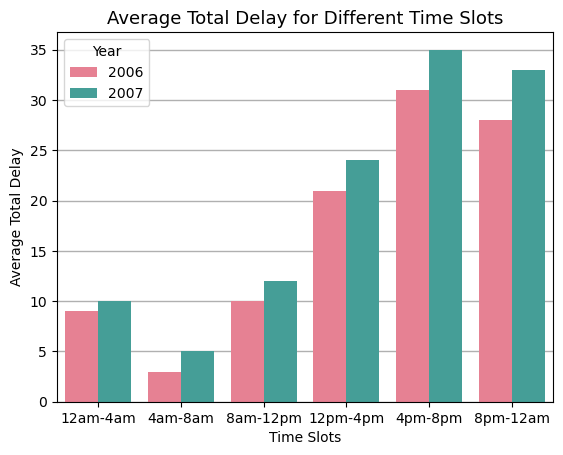

<Figure size 640x480 with 0 Axes>

In [16]:
#creating a side by side bar graph to represent average total delay for different time slots
custom_order = [ '12am-4am', '4am-8am', '8am-12pm', '12pm-4pm', '4pm-8pm', '8pm-12am']

sns.barplot(data=df, x ="TimeSlots", y = "AverageTotalDelay_TS", hue= "Year", palette = "husl",zorder=2, order=custom_order)
plt.title("Average Total Delay for Different Time Slots",size =13)
plt.grid(axis='y',linewidth = 1)
plt.ylabel('Average Total Delay')
plt.xlabel('Time Slots')
plt.show()
plt.savefig('Part 2(a)-python.png')

What are the best days of the week to minimise delays each year?

In [43]:
#finding the average delay in 2006 for days of the week
year_2006.groupby(['DayOfWeek'])['TotalDelay'].mean().sort_values().round()

DayOfWeek
6    13.0
2    14.0
3    17.0
7    18.0
1    19.0
4    23.0
5    25.0
Name: TotalDelay, dtype: float64

In [44]:
#finding the average delay in 2007 for days of the week
year_2007.groupby(['DayOfWeek'])['TotalDelay'].mean().sort_values().round()

DayOfWeek
6    15.0
2    18.0
3    21.0
7    22.0
1    22.0
4    25.0
5    27.0
Name: TotalDelay, dtype: float64

In [7]:
df['AverageTotalDelay_Dow'] = df.groupby(['Year','DayOfWeek'])['TotalDelay'].transform('mean').round()

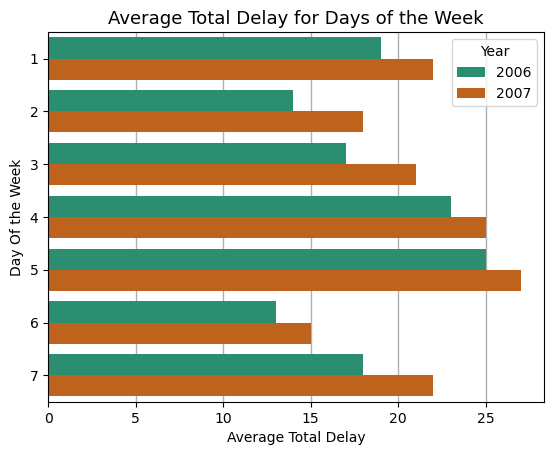

<Figure size 640x480 with 0 Axes>

In [8]:
#creating a horizontal side by side bar graph to represent average total delay for days of the week
sns.barplot(data=df, y ="DayOfWeek", x ="AverageTotalDelay_Dow", hue="Year", palette = "Dark2",zorder=2, orient='h')
plt.title("Average Total Delay for Days of the Week",size =13)
plt.grid(axis='x',linewidth = 1)
plt.xlabel('Average Total Delay')
plt.ylabel('Day Of the Week')
plt.show()
plt.savefig('Part2(a)(ii).png')